##  TF 표현
말뭉치에서 해당 단어의 출현 횟수

<Axes: >

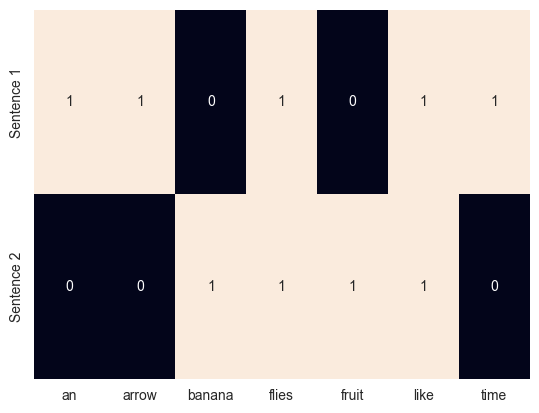

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

corpus = ['Time flies like an arrow.',
          'Fruit flies like a banana.']
one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
vocab = one_hot_vectorizer.get_feature_names_out()
sns.heatmap(one_hot, annot=True,
            cbar=False, xticklabels=vocab,
            yticklabels=['Sentence 1', 'Sentence 2'])

## TF-IDF 표현
흔한 단어일수록 중요도가 떨어지고 어떤 문서에 특정 단어가 등장할때 중요도가 증가
$ IDF(w) = log \frac{(N+1)}{(n_w+1)}\ + 1 $
분모와 분자에 1을 더해 분모가 0이 되지 않도록 계산 해야 함
또한, 마지막에 1을 더해 모든 문서에 포함된 단어가 있을때 IDF가 0이 되지 않게 해야 함

$ TF-IDF = TF(w)*IDF(w) $

<Axes: >

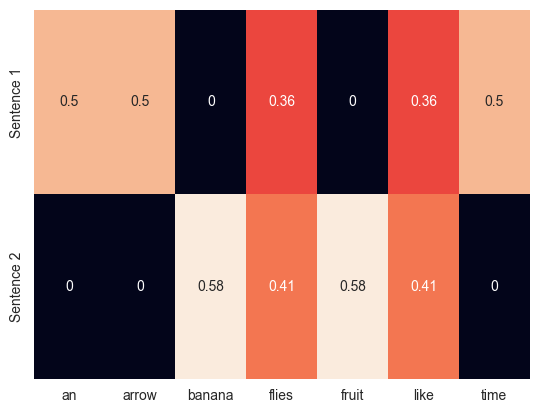

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=vocab, yticklabels=['Sentence 1', 'Sentence 2'])

## 파이토치 기초

In [3]:
def describe(x):
    print('타입: {}'.format(x.type()))
    print('크기: {}'.format(x.shape))
    print('값: \n{}'.format(x))

In [4]:
import torch
describe(torch.Tensor(2,3))

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [5]:
# 랜덤 초기화
describe(torch.rand(2, 3)) # 균등 분포
describe(torch.randn(2, 3)) # 표준 정규 분포

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[0.6853, 0.8417, 0.7969],
        [0.9958, 0.3626, 0.6055]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[-0.6610, -0.4788,  0.8125],
        [ 0.6384, -0.7901,  1.5792]])


In [6]:
# filled 메서드 사용
describe(torch.zeros(2, 3))
x = torch.ones(2, 3)
describe(x)
x.fill_(5)
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[0., 0., 0.],
        [0., 0., 0.]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[1., 1., 1.],
        [1., 1., 1.]])
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [7]:
# 파이썬 리스트로 텐서 만들기
x = torch.Tensor([[1, 2, 3],
                  [4, 5, 6]])
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [8]:
# 넘파이로 텐서 만들고 초기화, FloatTensor가 아닌 DoubleTensor 됨
import torch
import numpy as np
npy = np.random.rand(2, 3)
describe(torch.from_numpy(npy))

타입: torch.DoubleTensor
크기: torch.Size([2, 3])
값: 
tensor([[0.9912, 0.3554, 0.0951],
        [0.8981, 0.7185, 0.3404]], dtype=torch.float64)


## 텐서 타입과 크기

In [9]:
x = torch.FloatTensor([[1, 2, 3],
                       [4, 5, 6]])
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [10]:
x = x.long()
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[1, 2, 3],
        [4, 5, 6]])


In [11]:
x = torch.tensor([[1, 2, 3],
                  [4, 5, 6]], dtype=torch.int64)
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[1, 2, 3],
        [4, 5, 6]])


In [12]:
x = x.float()
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


## 텐서 연산

In [13]:
import torch
x = torch.randn(2, 3)
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[-0.0209, -1.8259, -0.7800],
        [ 0.0282, -0.0291, -0.2847]])


In [14]:
describe(torch.add(x, x))

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[-0.0417, -3.6518, -1.5600],
        [ 0.0565, -0.0582, -0.5695]])


In [15]:
describe(x + x) # torch.add와 동일한 결과

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[-0.0417, -3.6518, -1.5600],
        [ 0.0565, -0.0582, -0.5695]])


In [16]:
# 차원별 텐서 연산
x = torch.arange(6) # 0에서 부터 지정 값 이전까지 1씩 증가
describe(x)

타입: torch.LongTensor
크기: torch.Size([6])
값: 
tensor([0, 1, 2, 3, 4, 5])


In [17]:
x = x.view(2, 3)
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5]])


In [18]:
describe(torch.sum(x, dim=0)) # 행 덧셈

타입: torch.LongTensor
크기: torch.Size([3])
값: 
tensor([3, 5, 7])


In [19]:
describe(torch.sum(x, dim=1)) # 열 덧셈

타입: torch.LongTensor
크기: torch.Size([2])
값: 
tensor([ 3, 12])


In [20]:
describe(torch.transpose(x, 0, 1)) # 전치

타입: torch.LongTensor
크기: torch.Size([3, 2])
값: 
tensor([[0, 3],
        [1, 4],
        [2, 5]])


## 인덱싱, 슬라이싱, 연결

In [21]:
import torch
x = torch.arange(6).view(2, 3)
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5]])


In [22]:
describe(x[:1, :2]) # 0번째 행을 1번쨰 열까지

타입: torch.LongTensor
크기: torch.Size([1, 2])
값: 
tensor([[0, 1]])


In [23]:
describe(x[0,1])

타입: torch.LongTensor
크기: torch.Size([])
값: 
1


In [24]:
# 연속적이지 않은 텐서 인덱스
indices = torch.LongTensor([0, 2]) # 0, 2 선택
describe(torch.index_select(x, dim=1, index=indices))

타입: torch.LongTensor
크기: torch.Size([2, 2])
값: 
tensor([[0, 2],
        [3, 5]])


In [25]:
indices = torch.LongTensor([0 ,0])
describe(torch.index_select(x, dim=0, index=indices))

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [0, 1, 2]])


In [26]:
row_indices = torch.arange(2).long()
col_indices = torch.LongTensor([0, 1])
describe(x[row_indices, col_indices]) # [0, 0], [1, 1]을 선택

타입: torch.LongTensor
크기: torch.Size([2])
값: 
tensor([0, 4])


In [27]:
# 텐서 연결
import torch
x = torch.arange(6).view(2, 3)
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5]])


In [28]:
describe(torch.cat([x, x], dim=0))

타입: torch.LongTensor
크기: torch.Size([4, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])


In [29]:
describe(torch.cat([x, x], dim=1))

타입: torch.LongTensor
크기: torch.Size([2, 6])
값: 
tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])


In [30]:
describe(torch.stack([x, x]))

타입: torch.LongTensor
크기: torch.Size([2, 2, 3])
값: 
tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])


In [31]:
# 텐서의 선형대수 계산: 행렬 곱셈
x1 = torch.arange(6).view(2, 3)
describe(x1)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5]])


In [32]:
x2 = torch.ones(3, 2)
x2[:, 1] += 1
describe(x2)

타입: torch.FloatTensor
크기: torch.Size([3, 2])
값: 
tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])


In [33]:
describe(torch.mm(x1.float(), x2))

타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: 
tensor([[ 3.,  6.],
        [12., 24.]])


## 텐서와 계산 그래프

In [34]:
# 그레이디언트 연산을 할 수 있는 텐서 만들기
import torch
x = torch.ones(2, 2, requires_grad=True)
describe(x)
print(x.grad is None)

타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: 
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
True


In [36]:
y = (x + 2) * (x + 5) + 3
describe(y)
print(x.grad is None)

타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: 
tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)
True


In [37]:
z = y.mean()
describe(z)
z.backward()
print(x.grad is None)

타입: torch.FloatTensor
크기: torch.Size([])
값: 
21.0
False


## CUDA 텐서

In [38]:
# CUDA 텐서 만들기
print(torch.cuda.is_available())

False


In [41]:
# 장치에 무관하게 텐서 초기화
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
# apple silicon
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
print(device)

cpu
mps


In [42]:
x = torch.rand(3, 3).to(device)
describe(x)

타입: torch.mps.FloatTensor
크기: torch.Size([3, 3])
값: 
tensor([[0.2052, 0.2014, 0.6797],
        [0.2339, 0.2043, 0.8309],
        [0.0960, 0.7283, 0.9407]], device='mps:0')


In [43]:
# CUDA 텐서와 CPU 텐서 더하기
y = torch.rand(3, 3)
x + y
'''
덧셈 불가
'''

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, mps:0 and cpu!

In [44]:
cpu_device = torch.device('cpu')
y = y.to(cpu_device)
x = x.to(cpu_device)
x + y
'''
GPU로 데이터를 넣고 꺼내는 작업은 비용이 많이 듦
따라서 계산은 GPU로 수행하고 최종 결과만 CPU로 전송하는 방식으로 작업이 이루어짐
CUDA 장치가 여럿이라면 CUDA_VISIBLE_DEVICES 환경변수 사용할 수 있음
'''

tensor([[0.6485, 0.9399, 0.9132],
        [0.3188, 0.4949, 1.3113],
        [0.8993, 1.0921, 1.3346]])